## 3. Regression: Optimization of Long-Term Correction of Wind Data Using Regression Models

**Assignment Description**

In this assignment, you will work with realistic data from the wind industry. Vestas, a leading global company in wind energy, is interested in optimizing their methods for generating long-term corrected (LTC) wind data, which are used for planning the locations of new wind farms.
 
You will have access to two types of time series data:
 1) Mast time series data that represent the wind conditions at a specific location based on measurements from a wind measuring mast. These data usually cover a period of 1-4 years.
 2) Meso time series data that are based on weather measurement models and cover more than 20 years. While these data are less precise and don't exactly match the specific location, they provide a longer historical context.

Note that the mast data for this project is significantly longer than "typical" mast data. This allows cutting the data into training and test sets (or training, validation and test sets). Each set should cover all four seasons.

Your task is to develop a model using regression techniques that can generate LTC wind data. This LTC time series should be long, like the meso time series, but also give an accurate description of the wind conditions at the specific location.

**Objectives and Purpose**
 
The purpose of the assignment is to assess whether regression could be used instead of neural networks, which could potentially save time and money as it is generally quicker to perform a regression than to train a neural network. And the main objective is thus to develop a regression model that can generate LTC time series that are both accurate and cost-effective.

**Requirements**
1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.
    
    e. Resample the mast dataset to have the same frequency as the meso data. The meso data has one record for each hour, the mast data has one record for each 10 min.

        i. Note: You should not convert the ws / wd signals to vector-quantities and use those for the resampling. Resample the ws and wd signal individually instead. The turbines “yaw” to always point toward the incoming wind, so the interesting value is the wind speed and not the wind velocity.  
        ii. Be careful when resampling the wind directions. You don’t want the average of 0 degrees and 359 degrees to become ~180 degrees :-)

    f. Find the overlapping timestamps between the meso data and the resampled mast data. You only want to consider data in this overlapping time period in your training.

2. **Exploratory analysis:** You must do an exploratory analysis of the data. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. 
3. **Model Development:** Use appropriate machine learning principles and methodologies, including model training and testing and perhaps validation, cross-validation, and leave-one-out. You should apply and interpret regression models effectively for this task.
4. **Model Evaluation:** Evaluate the developed model using appropriate metrics such as Mean Squared Error (MSE), R-squared (R²), etc. The evaluation should give an indication of the usefulness of your model in predicting wind conditions accurately. 
In addition to calculating the above metric for your predicted time series, also consider comparing the distributions of the wind speeds in the predicted and the actual (resampled) mast data. That is, calculate the Weibull A- and k-parameters for both distributions, and find the error in these between your fit and the true data. "Error-in-A" and "Error-in-k" are the most used quantities to evaluate the long term correction process in the wind industry :-)
5. **Documentation and Presentation:** Clearly document the steps, methodologies, and tools you used during the process. Present the results of your model in a clear and effective manner. This documentation should be comprehensive enough for someone to replicate your process and understand your results. Hand-in as one Jupyter Notebook.


**Some additional comments**

They (Vestas) have also tried running their own LTC algorithm on some of the data (they chose the 77m wind speed and wind direction signals from the Risø dataset), and this yielded good results. They assumed that the data was in Danish time, so they believe that is the case.

As you can see, there is quite a focus on wind speeds (as they determine the amount of power produced). However, they know that their neural network operates by training on the different components of wind speed separately (meaning training one network on the x-component of the wind and another network on the y-component of the wind) and then combining them at the end. You may consider this method too. They are not sure if it yields better performance than training on wind speed and wind direction separately...but if time permits, give it a go.

**About the data**

The mast datasets are in netCDF format. It's quite easy to work with in Python (not sure if you've used it before?). In one of the folders, a test.py file is included that demonstrate how to load the dataset and access the most relevant mast signals.

The mast data has a measurement frequency of 10 minutes, while the meso data has a frequency of 1 hour. Therefore, you will need to resample the mast data to a 1-hour frequency before you can use it (see requirement 1.e above). Vestas does the same with their data. As mentioned you should be careful when resampling the angles so that the average of 0 degrees (north) and 359 degrees doesn't end up being approximately 180 degrees.

The data is publicly available. You can read more about it here:

*Risø:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/risoe_m.md

Data: https://data.dtu.dk/articles/dataset/Wind_resource_data_from_the_tall_Ris_met_mast/14153204 (this is the "DOI"-link from the description)


*Børglum:*

https://gitlab.windenergy.dtu.dk/fair-data/winddata-revamp/winddata-documentation/-/blob/kuhan-master-patch-91815/borglum.md

Data: https://data.dtu.dk/articles/dataset/Resource_data_from_the_Borglum_mast/14153231

The two meso datasets come from Vestas' climate library, and the meso data is in UTC time. They don't think you need anything other than the "wind speed" (WSP) and "wind direction" (WDIR) signals. They believe it's most appropriate to either use the height closest to the mast height (for example, if you're using the wind speed signal ws125 and the wind direction signal wd125 from the Risø dataset, you should use WSP120 and WDIR120 from the meso dataset) or use multiple signals and interpolate to the desired height (125m) (see the requirements above).

**Final comments**

In a perfect world, you can do all of the above. The assignment is "free" in the sense that you should give the above a go and do your best. Remember, there is no right answer. This assignment is a real-world machine learning task and not a "made-up" school task. There are software engineers at Vestas working on exactly the same task (albeit with a different dataset, which they arent' allowed to share with us). But try to discuss the problem in your group and distribute the work among you. You can even collaborate with other groups or find inspiration in their approach.

And remember. These portfolio assignments are not meant as "learn stuff in class and apply to assignment" - they are part of the learning process, and not simply a documentation of what you have learned. They should be seen as "learning by doing"-type assignments.

In session 5, we will do a Q/A if you have any questions. But as mentioned, try to give it a go. 

In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

file_path_risoe = './Data/Risoe/risoe_m_all.nc'

signals_risoe = ['ws77', 'wd77', 'ws125', 'wd125']

base_date_risoe = datetime(1995, 11, 20, 16, 25, 0)

# Get the Risoe dataset:
dataset = nc.Dataset(file_path_risoe, 'r')

# List the variables in the dataset
print("Variables in the netCDF file:")
for var_name in dataset.variables:
    print(var_name)

time_minutes = np.array(dataset.variables['time'])

# Convert time values to timestamp strings
time = []
for minutes in time_minutes:
    time_delta = timedelta(minutes=int(minutes))
    timestamp = base_date_risoe + time_delta
    time.append(timestamp)

# Creating DataFrame
data = {}
for signal in signals_risoe:
    data[signal] = np.array(dataset.variables[signal])

df = pd.DataFrame(data, index=time)

print(df.head())  # print the first 5 rows of the DataFrame to check the values


Variables in the netCDF file:
time
ws44
ws44_qc
ws77
ws77_qc
ws125
ws125_qc
wd77
wd77_qc
wd125
wd125_qc
t003
t003_qc
t044
t044_qc
t118
t118_qc
td01
td01_qc
rain
rain_qc
press
press_qc
rhum
rhum_qc
grad
grad_qc
                     ws77   wd77  ws125  wd125
1995-11-20 16:25:00  3.36  205.0   3.04  208.0
1995-11-20 16:35:00  3.05  205.0   3.17  214.0
1995-11-20 16:45:00  3.59  204.0   3.64  209.0
1995-11-20 16:55:00  3.87  202.0   3.77  209.0
1995-11-20 17:05:00  4.74  201.0   4.28  212.0


1. **Data preprocessing:** You must handle large datasets and perform necessary data preprocessing tasks. This includes dealing with missing values, handling outliers, and scaling data appropriately for the chosen regression technique.

    a. Consider the appropriate intervals for wind speeds and wind directions. No negative wind speeds are allowed, and wind directions should be in an appropriate interval (e.g. [0; 360[ degrees).

    b. Select which ws / wd signals to use. Signals at higher altitude are generally better, but it is even more important to have proper coverage of all seasons.

    c. Find the meso-signals closest in height to the mast-data-signal you are using. Or interpolate the values between 2 or more meso-signals to get the values at the exact mast-signal-height.

    d. Convert the mast data from DK time to UTC time (corresponding to the time zone used in the meso data). Remember to account for summer-time in DK.

In [4]:
import pandas as pd

In [6]:
import pandas as pd
import numpy as np
import pytz

# Load the meso data
meso_Risoe_csv = './Data/Risoe/meso_risoe.csv'
meso_Risoe = pd.read_csv(meso_Risoe_csv, sep=',')
meso_Risoe['TIMESTAMP'] = pd.to_datetime(meso_Risoe['TIMESTAMP'])

# Assume mast data is in a DataFrame called df with timestamp as index
# Convert the 'timestamp' to datetime and set timezone to Copenhagen time
#reset index
df.reset_index(inplace=True)
df['timestamp'] = pd.to_datetime(df['index'])
# Handle ambiguous time error by assuming it is Standard Time ('ST')
df['timestamp'] = df['timestamp'].dt.tz_localize('Europe/Copenhagen', nonexistent='shift_forward', ambiguous='NaT')
df['timestamp'] = df['timestamp'].dt.tz_convert('UTC')



# Now you can set the timestamp as the index and proceed with resampling
df.set_index('timestamp', inplace=True)

# Resample the wind speed (ws) for every hour
mast_data_resampled_ws = df['ws77'].resample('1H').mean()
mast_data_resampled_ws_125 = df['ws125'].resample('1H').mean()

# For wind direction (wd), convert to radians, compute the mean of sin and cos, and convert back to degrees
df['wd77_rad'] = np.deg2rad(df['wd77'])
df['wd125_rad'] = np.deg2rad(df['wd125'])
mast_data_resampled_wd_sin = np.sin(df['wd77_rad']).resample('1H').mean()
mast_data_resampled_wd_125_sin = np.sin(df['wd125_rad']).resample('1H').mean()
mast_data_resampled_wd_cos = np.cos(df['wd77_rad']).resample('1H').mean()
mast_data_resampled_wd_125_cos = np.cos(df['wd125_rad']).resample('1H').mean()
mast_data_resampled_wd = np.arctan2(mast_data_resampled_wd_sin, mast_data_resampled_wd_cos)
mast_data_resampled_wd_125 = np.arctan2(mast_data_resampled_wd_125_sin, mast_data_resampled_wd_125_cos)
mast_data_resampled_wd = np.rad2deg(mast_data_resampled_wd) % 360
mast_data_resampled_wd_125 = np.rad2deg(mast_data_resampled_wd_125) % 360

# Combine resampled data
mast_data_resampled = pd.DataFrame({
    'ws77': mast_data_resampled_ws,
    'wdir77': mast_data_resampled_wd
})

mast_data_resampled_125 = pd.DataFrame({
    'ws125': mast_data_resampled_ws_125,
    'wdir125': mast_data_resampled_wd_125
})

# Combine the two dataframes
mast_data_resampled = pd.concat([mast_data_resampled, mast_data_resampled_125], axis=1)

2. **Exploratory analysis:** You must do an exploratory analysis of the data. This includes presenting the data in tables and graphs, study and describe features of interest, as well as correlation analysis. Wind speeds typically follow a Weibull-distributions. Try fitting a Weibull distribution to the mast data, the resampled mast data and the meso-data. 

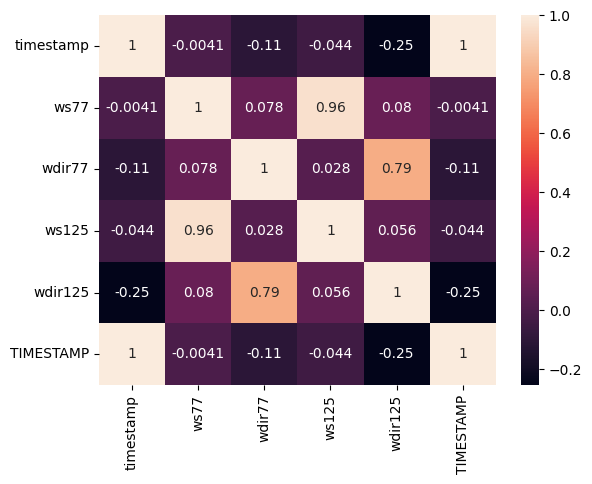

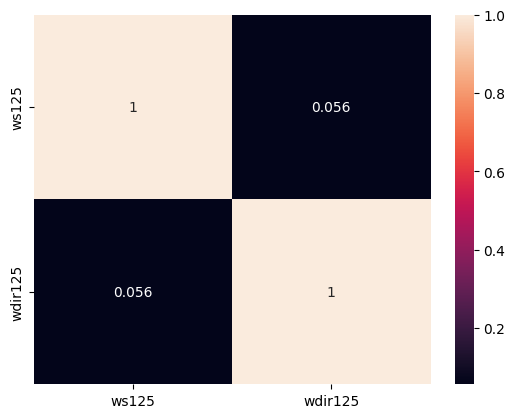

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation matrix
corr = mast_data_resampled.corr()
corr_125 = mast_data_resampled_125.corr()
corr_meso = meso_Risoe.corr()

#plotting correlation matrix
sns.heatmap(corr, annot=True)
plt.show()
sns.heatmap(corr_125, annot=True)
plt.show()

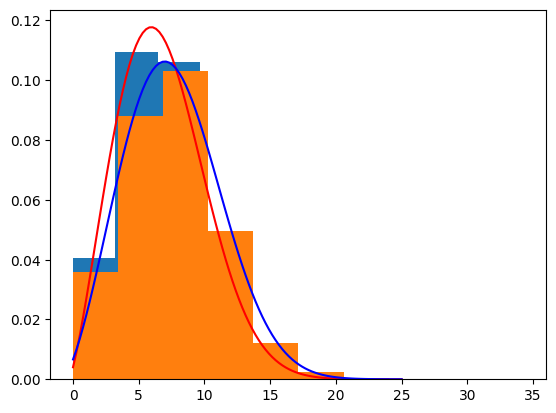

In [38]:

#Weibull distribution

from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import seaborn as sns

#fitting weibull distribution to mast data
#drop nan values
df.dropna(inplace=True)
param = weibull_min.fit(df['ws77'])
param_125 = weibull_min.fit(df['ws125'])

#plotting weibull distribution
x = np.linspace(0, 25, 100)
pdf_fitted = weibull_min.pdf(x, *param)
pdf_fitted_125 = weibull_min.pdf(x, *param_125)

plt.plot(x, pdf_fitted, 'r-', x, pdf_fitted_125, 'b-')
plt.hist(df['ws77'], bins=10, density=True)
plt.hist(df['ws125'], bins=10, density=True)
plt.show()

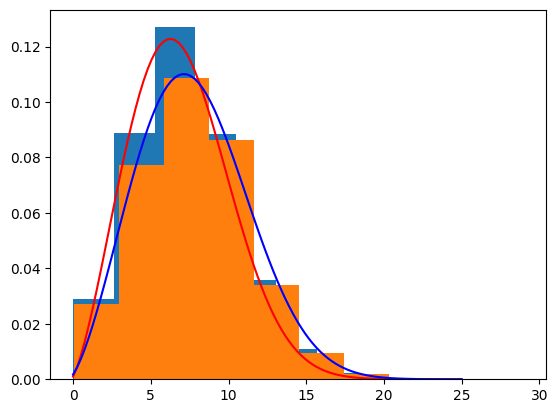

In [46]:
param_meso = weibull_min.fit(meso_Risoe['WSP080'])
param_meso_120 = weibull_min.fit(meso_Risoe['WSP120'])

#plotting weibull distribution
x = np.linspace(0, 25, 100)
pdf_fitted_meso = weibull_min.pdf(x, *param_meso)
pdf_fitted_meso_120 = weibull_min.pdf(x, *param_meso_120)

plt.plot(x, pdf_fitted_meso, 'r-', x, pdf_fitted_meso_120, 'b-')
plt.hist(meso_Risoe['WSP080'], bins=10, density=True)
plt.hist(meso_Risoe['WSP120'], bins=10, density=True)
plt.show()

In [7]:
mast_data_resampled.reset_index(inplace=True)
mast_data_resampled['TIMESTAMP'] = mast_data_resampled['timestamp']
meso_Risoe['TIMESTAMP'] = meso_Risoe['TIMESTAMP'].dt.tz_localize('UTC')


In [8]:
df_merged = pd.merge(mast_data_resampled, meso_Risoe, on='TIMESTAMP', how='inner')

In [9]:
final_df = df_merged[['TIMESTAMP', 'ws77', 'wdir77', 'WSP080', 'WDIR080', 'ws125', 'wdir125', 'WDIR120', 'WSP120', 'HGT']]

In [10]:
final_df.dropna(inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_5756\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [11]:
final_df['TIMESTAMP'] = final_df['TIMESTAMP'].dt.strftime('%Y-%m-%d %H:%M:%S')
#timestamp as index
final_df.set_index('TIMESTAMP', inplace=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_5756\142385837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['TIMESTAMP'] = final_df['TIMESTAMP'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [22]:
#add also new features Summer,Winter, Spring, Autumn based on the month
final_df['month'] = final_df.index.str[5:7]
final_df['month'] = final_df['month'].astype(int)
final_df['Summer'] = np.where((final_df['month'] >= 6) & (final_df['month'] <= 8), 1, 0)
final_df['Winter'] = np.where((final_df['month'] == 12) | (final_df['month'] <= 2), 1, 0)
final_df['Spring'] = np.where((final_df['month'] >= 3) & (final_df['month'] <= 5), 1, 0)
final_df['Autumn'] = np.where((final_df['month'] >= 9) & (final_df['month'] <= 11), 1, 0)

C:\Users\micha\AppData\Local\Temp\ipykernel_5756\1253232166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['month'] = final_df.index.str[5:7]
C:\Users\micha\AppData\Local\Temp\ipykernel_5756\1253232166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['month'] = final_df['month'].astype(int)
C:\Users\micha\AppData\Local\Temp\ipykernel_5756\1253232166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [23]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)]

# Select only the numerical columns for outlier removal
numerical_cols = final_df.select_dtypes(include='number')

# Remove outliers
final_df_cleaned = final_df.copy()  # Create a copy to keep the original intact
final_df_cleaned[numerical_cols.columns] = remove_outliers(final_df_cleaned[numerical_cols.columns])
final_df_cleaned.dropna(inplace=True)

In [24]:
df77 = final_df_cleaned[['ws77', 'wdir77']]
labelWSP80 = final_df_cleaned['WSP080']
labelWDIR80 = final_df_cleaned['WDIR080']

In [27]:
#WITHOUT OUTLIERS
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df77, labelWSP80, test_size=0.2, random_state=42)

knn = KNeighborsRegressor()
params = {'n_neighbors': [3,5,8,10,12,21,51,101,151]}

knn_cv = GridSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

print("Mean squared error WITHOUT OUTLIERS: ",mean_squared_error(y_test, y_pred))
print("Mean absolute error WITHOUT OUTLIERS: ", np.mean(np.absolute(y_pred - y_test)))
print('R2 score WITHOUT OUTLIERS:', r2_score(y_test, y_pred))
print('Explained variance score WITHOUT OUTLIERS:', knn_cv.score(X_test, y_test))

print(knn_cv.best_score_) 
print(knn_cv.best_params_)

#WITH OUTLIERS
X_train, X_test, y_train, y_test = train_test_split(final_df[['ws77', 'wdir77']], final_df['WSP080'], test_size=0.2, random_state=42)



knn = KNeighborsRegressor()
params = {'n_neighbors': [3,5,8,10,12,21,51,101,151]}

knn_cv = GridSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

print("Mean squared error WITHOUT: ",mean_squared_error(y_test, y_pred))
print("Mean absolute error WITHOUT: ", np.mean(np.absolute(y_pred - y_test)))
print('R2 score WITHOUT:', r2_score(y_test, y_pred))
print('Explained variance score WITHOUT:', knn_cv.score(X_test, y_test))

print(knn_cv.best_score_) 
print(knn_cv.best_params_)

Mean squared error WITHOUT OUTLIERS:  2.6104591541088493
Mean absolute error WITHOUT OUTLIERS:  1.2503642818553677
R2 score WITHOUT OUTLIERS: 0.6558777163461864
Explained variance score WITHOUT OUTLIERS: 0.6558777163461864
0.6706253168035683
{'n_neighbors': 21}
Mean squared error WITHOUT:  2.594925371218129
Mean absolute error WITHOUT:  1.2421428571428572
R2 score WITHOUT: 0.7254240156037257
Explained variance score WITHOUT: 0.7254240156037257
0.7204055918271426
{'n_neighbors': 21}


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df77, labelWDIR80, test_size=0.2, random_state=42)

knn = KNeighborsRegressor()
params = {'n_neighbors': [3,5,8,10,12,21,51,101,151]}

knn_cv = GridSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

print("Mean squared error WITHOUT OUTLIERS: ",mean_squared_error(y_test, y_pred))
print("Mean absolute error WITHOUT OUTLIERS: ", np.mean(np.absolute(y_pred - y_test)))
print('R2 score WITHOUT OUTLIERS:', r2_score(y_test, y_pred))
print('Explained variance score WITHOUT OUTLIERS:', knn_cv.score(X_test, y_test))

print(knn_cv.best_score_) 
print(knn_cv.best_params_)

#WITH OUTLIERS
X_train, X_test, y_train, y_test = train_test_split(final_df[['ws77', 'wdir77']], final_df['WDIR080'], test_size=0.2, random_state=42)



knn = KNeighborsRegressor()
params = {'n_neighbors': [3,5,8,10,12,21,51,101,151]}

knn_cv = GridSearchCV(knn, params, cv=5)
knn_cv.fit(X_train, y_train)
y_pred = knn_cv.predict(X_test)

print("Mean squared error WITHOUT: ",mean_squared_error(y_test, y_pred))
print("Mean absolute error WITHOUT: ", np.mean(np.absolute(y_pred - y_test)))
print('R2 score WITHOUT:', r2_score(y_test, y_pred))
print('Explained variance score WITHOUT:', knn_cv.score(X_test, y_test))

print(knn_cv.best_score_) 
print(knn_cv.best_params_)

Mean squared error WITHOUT OUTLIERS:  2960.2059071893796
Mean absolute error WITHOUT OUTLIERS:  29.94715082205141
R2 score WITHOUT OUTLIERS: 0.6031880956048224
Explained variance score WITHOUT OUTLIERS: 0.6031880956048224
0.5776111151681379
{'n_neighbors': 101}
Mean squared error WITHOUT:  3202.514195203268
Mean absolute error WITHOUT:  30.643319131912683
R2 score WITHOUT: 0.6081479546911817
Explained variance score WITHOUT: 0.6081479546911817
0.6044779758821894
{'n_neighbors': 151}
